In [19]:
import pandas as pd

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
import spacy
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [20]:
# path = "/kaggle/input/nlp-getting-started/"
path = "./data/"

In [21]:
df = pd.read_csv(path + "train.csv")

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<Axes: >

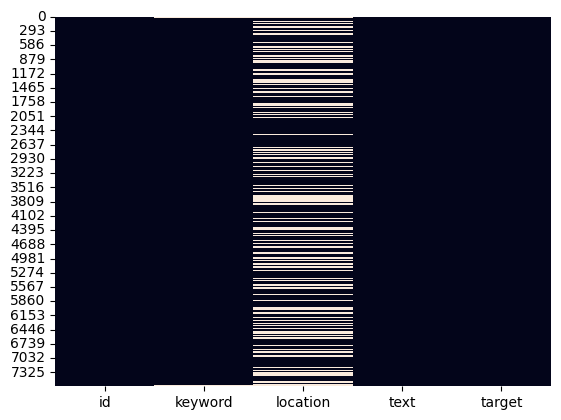

In [22]:
sns.heatmap(df.isnull(), cbar=False)

In [23]:
df.drop(columns=["location", "keyword"], inplace=True)

nlp = spacy.load("en_core_web_sm")
def clean(text):
    text = text.lower() #lowercase
    # text = re.sub(r'[#@]\S+', '', text) #remove hashtags
    text = re.sub(r'[@]\S+', '', text) #remove mentions
    text = re.sub(r'http[s]?\://\S+', '', text) #remove links
    text = re.sub('<.*?>+', '', text) #removes HTML tags
    text = re.sub('\d', '', text) #removes digits

    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc if not token.is_stop])

    text = re.sub('\n', '', text) #removes newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove punctuation
    text = re.sub(r'\s+', ' ', text).strip() #remove extra spaces



    return text

df['cleaned'] = df['text'].apply(clean)

df = df.rename(columns = {'target':'target_', 'id':'id_'})

df[:50]

,id_,text,target_,cleaned
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...
5,8,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy close directio...
6,10,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,13,I'm on top of the hill and I can see a fire in...,1,hill fire wood
8,14,There's an emergency evacuation happening now ...,1,emergency evacuation happen building street
9,15,I'm afraid that the tornado is coming to our a...,1,afraid tornado come area


In [24]:
tfidf = TfidfVectorizer(max_features=5000)

def vectorize(dataset):
    tfidf_vec = tfidf.fit_transform(dataset["cleaned"]).toarray()
    dataset_vec = pd.DataFrame(tfidf_vec, columns=tfidf.get_feature_names_out())
    dataset_vec.head()

    dataset = dataset.drop(columns='cleaned')
    dataset = dataset.drop(columns='text')

    print(len(dataset))
    print(len(dataset_vec))
    dataset = pd.concat([dataset, dataset_vec], axis=1)
    print(len(dataset))
    return dataset

In [25]:
df_vec = vectorize(df)

7613
7613
7613


In [26]:
df_vec

,id_,target_,aa,ab,aba,abandon,abbott,abbswinston,abc,abcnews,...,zimbabwe,zionism,zionist,zip,zippednew,zipper,zombie,zone,zouma,zss
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,10870,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,10871,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,10872,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y = df_vec["target_"]
X = df_vec.drop(["target_", "id_"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
X_train.head()

,aa,ab,aba,abandon,abbott,abbswinston,abc,abcnews,abe,abia,...,zimbabwe,zionism,zionist,zip,zippednew,zipper,zombie,zone,zouma,zss
3651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8042907180385289

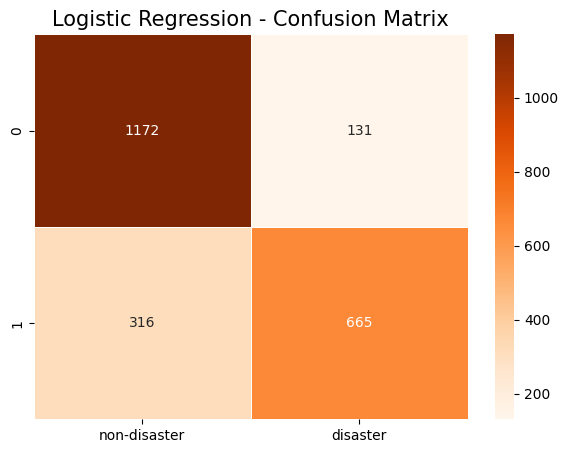

In [30]:
fig, ax=plt.subplots(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.4, cmap="Oranges", fmt='.4g', ax=ax)
ax.set_xticklabels(["non-disaster", "disaster"])
ax.set_title("Logistic Regression - Confusion Matrix", fontsize=15)
plt.show()